In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [4]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\mauri\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('C:/Users/mauri/Documents/Important IH Files/lab-customer-analysis-round-5/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [5]:
training_dataset, test_dataset = train_test_split(data)


In [32]:
list(data.head(0))

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [8]:
training_dataset

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2814,IU17657,California,2616.409509,No,Basic,Bachelor,1/30/11,Disabled,M,22000,...,36,0,1,Personal Auto,Personal L3,Offer2,Web,383.224514,Two-Door Car,Medsize
5133,ZM52280,Arizona,11972.782310,No,Basic,Bachelor,2/2/11,Unemployed,M,0,...,67,2,5,Personal Auto,Personal L2,Offer1,Web,1441.843837,Luxury SUV,Large
6239,DX91931,Washington,10242.409600,No,Premium,College,2/12/11,Unemployed,M,0,...,20,0,8,Personal Auto,Personal L1,Offer1,Branch,1080.000000,SUV,Small
6205,WI52672,California,13576.143000,No,Basic,High School or Below,2/23/11,Employed,F,94153,...,5,0,2,Corporate Auto,Corporate L3,Offer1,Web,4.845348,SUV,Medsize
2290,GZ31904,Oregon,6861.745956,No,Extended,College,2/22/11,Employed,M,30816,...,43,0,4,Personal Auto,Personal L1,Offer3,Call Center,237.570330,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,CA86085,Washington,5608.316348,No,Basic,High School or Below,2/22/11,Employed,M,67176,...,90,0,9,Personal Auto,Personal L3,Offer2,Branch,345.600000,Four-Door Car,Large
1495,NU42684,Nevada,3394.720301,No,Extended,College,1/28/11,Employed,F,83431,...,33,0,1,Personal Auto,Personal L3,Offer2,Web,403.200000,Four-Door Car,Medsize
1587,YJ43481,Arizona,8528.288669,No,Basic,High School or Below,1/4/11,Employed,F,91099,...,37,0,3,Corporate Auto,Corporate L2,Offer1,Call Center,406.430632,SUV,Medsize
448,NL93182,Nevada,2549.450038,No,Extended,Bachelor,1/20/11,Unemployed,M,0,...,32,0,1,Corporate Auto,Corporate L3,Offer2,Web,845.654042,Four-Door Car,Small


In [9]:
test_dataset

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5746,YP27180,California,27279.336470,No,Basic,College,2/7/11,Employed,F,76530,...,9,4,2,Personal Auto,Personal L2,Offer3,Call Center,254.149197,SUV,Medsize
9006,VC11777,California,5187.653993,No,Basic,High School or Below,2/23/11,Employed,F,80521,...,43,2,9,Personal Auto,Personal L1,Offer1,Branch,342.913243,Four-Door Car,Small
3731,LH26131,Nevada,3876.772694,No,Premium,High School or Below,2/8/11,Unemployed,F,0,...,18,0,1,Personal Auto,Personal L2,Offer1,Agent,1099.233361,Two-Door Car,Large
6193,CJ78860,Oregon,3649.194138,No,Basic,High School or Below,1/17/11,Unemployed,M,0,...,50,0,1,Personal Auto,Personal L2,Offer1,Agent,748.800000,SUV,Medsize
6765,QV65644,Oregon,6113.869984,No,Extended,High School or Below,2/4/11,Unemployed,M,0,...,7,0,5,Personal Auto,Personal L2,Offer1,Branch,1034.799615,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,FW53453,California,7834.151482,No,Extended,Master,1/17/11,Employed,F,36094,...,50,1,5,Personal Auto,Personal L1,Offer2,Branch,456.503570,Two-Door Car,Medsize
4180,KG40352,Oregon,5447.201066,No,Basic,College,2/18/11,Employed,F,68815,...,37,0,3,Personal Auto,Personal L2,Offer4,Branch,114.743385,Four-Door Car,Small
6545,RR64429,California,6778.844570,No,Extended,High School or Below,2/25/11,Unemployed,M,0,...,84,0,9,Personal Auto,Personal L3,Offer2,Agent,460.800000,Four-Door Car,Small
3877,SN58128,Oregon,10396.531860,No,Extended,College,2/18/11,Employed,F,34948,...,15,0,7,Personal Auto,Personal L1,Offer4,Branch,443.786437,SUV,Small


In [11]:
x_num = data.select_dtypes(include = np.number)

In [13]:
x_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [14]:
transformer = Normalizer().fit(x_num)

In [16]:
x_normalized = transformer.transform(x_num)

In [17]:
print(x_normalized.shape)

(9134, 8)


In [22]:
x_fra_nor = pd.DataFrame(x_normalized)

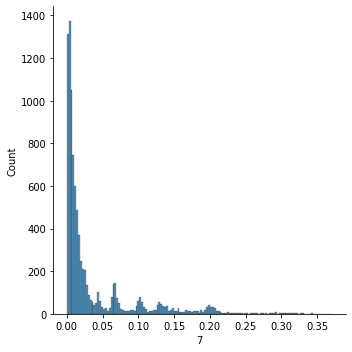

In [30]:
sns.displot(x_fra_nor[7])